In [1]:
import time
start_time=time.time()

In [2]:
#from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate
import numpy as np
import pandas as pd
import json
import itertools

from astropy.io import fits
import astropy.units as u
#from astropy.table import Table

import turbustat.statistics as tss

#from scipy.fftpack import fft
#import math
#import sys
#import os
#from PIL import Image

from sabreMod import sosf
import strucfunc

Text(0.5, 1.0, 'H$_{α}$ Flux')

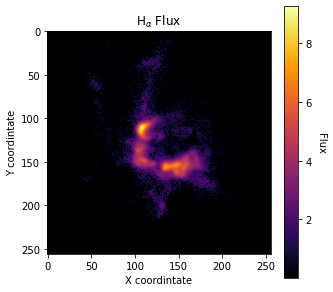

In [3]:
FitsFile= 'Obs/TAURUS.595.Ha.Flux'
hdul=fits.open(FitsFile + '.fits')
fig, ax = plt.subplots(figsize=(5, 5))
image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('H$_{α}$ Flux')

In [4]:
flx=hdul[0].data
df=pd.DataFrame(flx)
dffx=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'I'})
dffx.describe()

,X,Y,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,2.822382e-01
std,73.900834,73.900834,8.645264e-01
min,0.000000,0.000000,2.314902e-09
25%,63.750000,63.750000,2.314902e-09
50%,127.500000,127.500000,2.314902e-09
75%,191.250000,191.250000,2.314902e-09
max,255.000000,255.000000,9.260010e+00


Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

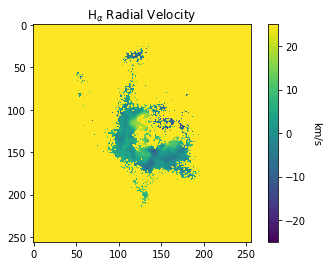

In [5]:
FitsFile= 'Obs/TAURUS.595.Ha.RV'
hdul=fits.open(FitsFile + '.fits')
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-25,25) 
plt.title('H$_{α}$ Radial Velocity')

In [6]:
vel=hdul[0].data
df=pd.DataFrame(vel)
dfvr=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
dfvr.describe()

,X,Y,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,290.868363
std,73.900834,73.900834,120.844926
min,0.000000,0.000000,-25.025787
25%,63.750000,63.750000,341.519989
50%,127.500000,127.500000,341.519989
75%,191.250000,191.250000,341.519989
max,255.000000,255.000000,341.519989


Text(0.5, 1.0, 'H$_{α}$ σ$_{disp}$')

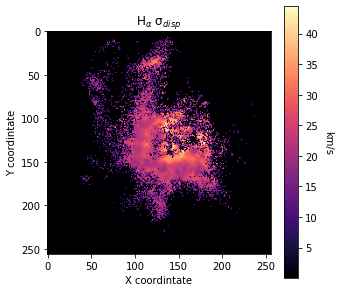

In [7]:
FitsFile= 'Obs/TAURUS.595.Ha.Sigma'
hdul=fits.open(FitsFile + '.fits')
fig, ax = plt.subplots(figsize=(5, 5))
image_data=hdul[0].data
plt.imshow(image_data, cmap='magma')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.title('H$_{α}$ σ$_{disp}$')

In [8]:
sig=hdul[0].data
df=pd.DataFrame(sig)
dsig=df.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'Sig'})
dsig.describe()

,X,Y,Sig
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,3.881712e+00
std,73.900834,73.900834,9.424380e+00
min,0.000000,0.000000,1.111131e-08
25%,63.750000,63.750000,1.111131e-08
50%,127.500000,127.500000,1.111131e-08
75%,191.250000,191.250000,1.111131e-08
max,255.000000,255.000000,4.444924e+01


In [9]:
data=dfvr
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

,X,Y,RV,I,Sig
count,65536.000000,65536.000000,65536.000000,6.553600e+04,6.553600e+04
mean,127.500000,127.500000,290.868363,2.822382e-01,3.881712e+00
std,73.900834,73.900834,120.844926,8.645264e-01,9.424380e+00
min,0.000000,0.000000,-25.025787,2.314902e-09,1.111131e-08
25%,63.750000,63.750000,341.519989,2.314902e-09,1.111131e-08
50%,127.500000,127.500000,341.519989,2.314902e-09,1.111131e-08
75%,191.250000,191.250000,341.519989,2.314902e-09,1.111131e-08
max,255.000000,255.000000,341.519989,9.260010e+00,4.444924e+01


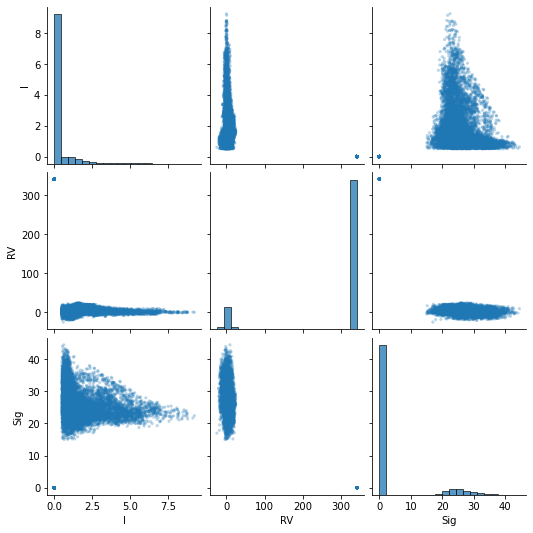

In [10]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

In [11]:
mI=data.I>data.I.mean()+0.5*data.I.std()
data=data[mI]

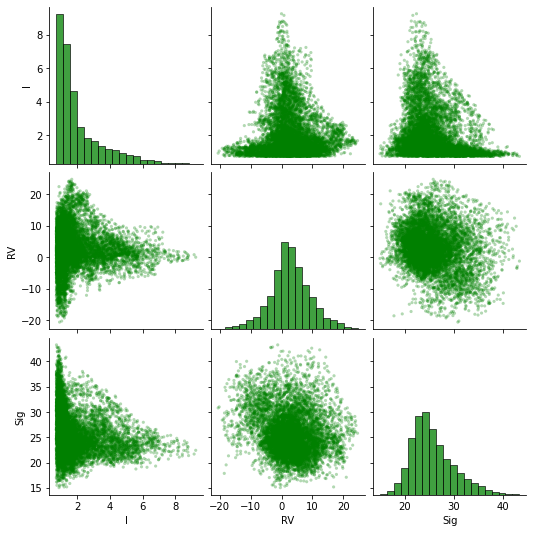

In [12]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="green"),
             diag_kws=dict(bins=20, color="green"),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHA.png')

In [13]:
data.describe()

,X,Y,RV,I,Sig
count,8765.000000,8765.000000,8765.000000,8765.000000,8765.000000
mean,129.266743,130.180947,2.821943,2.037856,25.628524
std,41.247226,31.236183,6.643250,1.409344,4.291403
min,11.000000,38.000000,-20.539368,0.714868,15.030182
25%,105.000000,110.000000,-0.919708,1.061956,22.650513
50%,136.000000,127.000000,2.495300,1.508847,24.844576
75%,159.000000,153.000000,6.669220,2.504355,27.989908
max,217.000000,205.000000,24.659454,9.260010,43.284180


Text(0.5, 1.0, 'H$_{α}$ Flux')

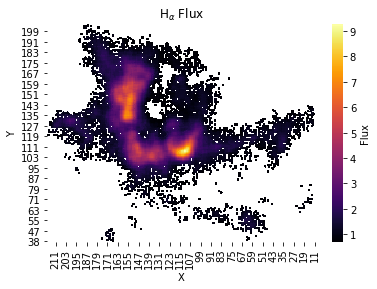

In [14]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ Flux')

Text(0.28, 0.14, '60 pc')

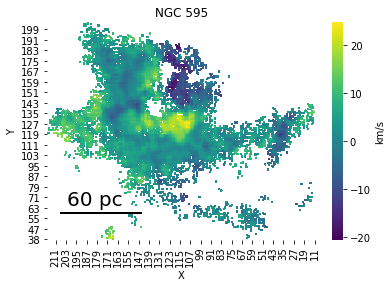

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

datal=data.copy()

dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.title('NGC 595')

plt.axhline(y=20, xmin=0.05, xmax=0.35, linewidth=2, color = 'k')

ax.text(0.28, 0.14, '60 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)


Text(0.5, 1.0, 'H$_{α}$ σ')

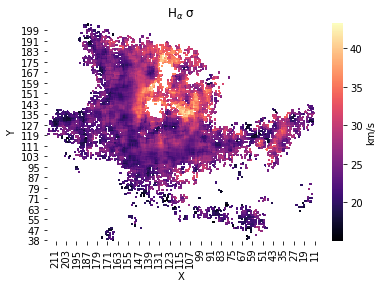

In [16]:
datal=data.copy()
dataH_s=(datal.round(2)).pivot(index='Y', columns='X', values='Sig')
sns.heatmap(dataH_s, cmap="magma",cbar_kws={'label': 'km/s'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('H$_{α}$ σ')


In [17]:
data.Sig=(data.Sig**2-9.87**2-14.5**2)**0.5

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


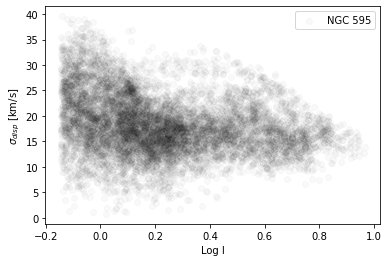

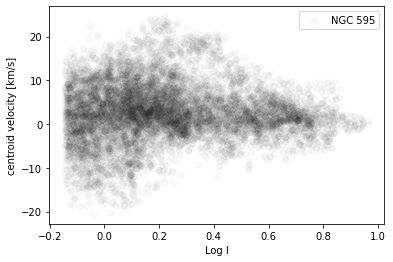

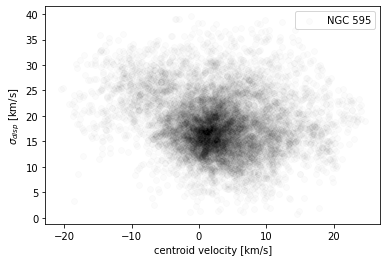

In [18]:
fig, ax = plt.subplots()
plt.scatter(np.log10(data.I),data.Sig, alpha=0.025, color='k',label='NGC 595')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{disp}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(data.I),data.RV, alpha=0.025, color='k',label='NGC 595')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(data.RV,data.Sig, alpha=0.015, color='k',label='NGC 595')

ax.set_xlabel('centroid velocity [km/s]')
ax.set_ylabel('$σ_{disp}$ [km/s]')
plt.legend()


Structure Function

phd

In [19]:
pc=1.05

1.0


[None, None]

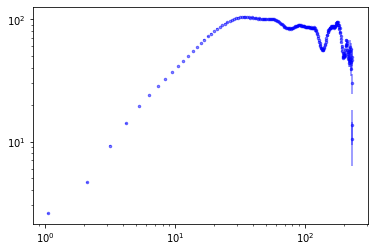

In [20]:
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [21]:
df = SF[['Lag', 'Nmqvd']].copy()
df=df.rename(columns={"Lag": "pc", "Nmqvd": "S"})
df.to_csv('595.csv',mode = 'w', index=False)

In [22]:
x=SF['Lag']
y=SF['Nmqvd']-(data["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([ 11.17051122, 218.24045867, 218.30707878, 221.97510765,
       222.36735514, 225.35153703, 226.58268009, 228.9498212 ])

In [23]:
s=SFr[0]

In [24]:
ss=np.round((data['RV'].std())**2,2)

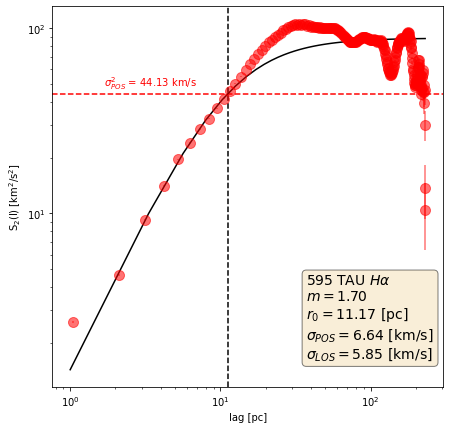

In [25]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.55, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.7

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('595 TAU ' r'$Hα$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(data["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

Dr. Will

In [26]:
sb=np.array(dataH_f)

In [27]:
vv=np.array(dataH_rv)

In [28]:
ss=np.array(dataH_s)

In [29]:
# Replace spurious values in the arrays
m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)
sb[m] = 0.0
vv[m] = np.nanmean(vv)
sb /= sb.max()

<ipython-input-29-d66c5605846e>:2: RuntimeWarning: invalid value encountered in less
  m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)


In [30]:
rslt = strucfunc.strucfunc_numba_parallel(vv, wmap=sb, dlogr=0.15)

In [31]:
good = (~m) & (sb > 0.001)
rslt["Unweighted mean velocity"] = np.mean(vv[good])
rslt["Unweighted sigma^2"] = np.var(vv[good])
v0w = rslt["Weighted mean velocity"] = np.average(vv, weights=sb)
rslt["Weighted sigma^2"] = np.average((vv - v0w)**2, weights=sb)

In [32]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [33]:
jsonfilename = "595sfh.json"
with open(jsonfilename, "w") as f:
    json.dump(rslt, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

595sfh.json

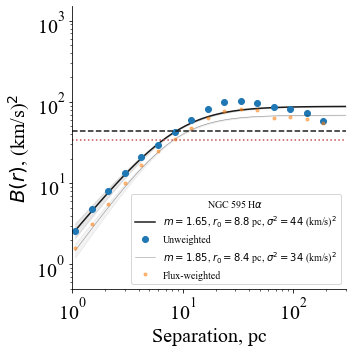

In [34]:
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

def bfunc(r, r0, sig2, m):
    "Theoretical structure function"
    C = 1.0 / (1.0 + (r/r0)**m)
    return 2.0*sig2*(1 - C)

data = json.load(open("595sfh.json"))

sns.set_color_codes()
fig, ax = plt.subplots(figsize=(5, 5))

figfile = "595.pdf"

pixscale = 0.26 # arcsec
pixscale *= 4.09              # parsec
r = pixscale * 10**np.array(data["log10 r"])
B = np.array(data["Unweighted B(r)"])
sig2 = data["Unweighted sigma^2"]
B_w = np.array(data["Weighted B(r)"])
sig2_w = data["Weighted sigma^2"]

# Plot fit to unweighted strucfunc
rgrid = pixscale * np.logspace(0.0, 2.7)
r0 = np.interp(sig2, B, r)
m = 1.65
flabel = rf"$m = {m:.2f}$, $r_0 = {r0:.1f}$ pc, $\sigma^2 = {sig2:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0, sig2, m - 0.1),
    bfunc(rgrid, r0, sig2, m + 0.1),
    color="k", alpha=0.1,
)
ax.plot(rgrid, bfunc(rgrid, r0, sig2, m), color="k", label=flabel)

# Plot points from unweighted strucfunc
ax.plot(r, B, 'o', label="Unweighted")


# Plot fit to weighted strucfunc
r0_w = np.interp(sig2_w, B_w, r)
m_w = 1.85
flabel_w = rf"$m = {m_w:.2f}$, $r_0 = {r0_w:.1f}$ pc, $\sigma^2 = {sig2_w:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0_w, sig2_w, m_w - 0.1),
    bfunc(rgrid, r0_w, sig2_w, m_w + 0.1),
    color="k", alpha=0.05,
)
ax.plot(rgrid, bfunc(rgrid, r0_w, sig2_w, m_w), lw=0.5, color="k", alpha=0.5, label=flabel_w)

# Plot points from weighted strucfunc
ax.plot(r, B_w, 'o', ms=3, alpha=0.5, label="Flux-weighted")


#melnick_r = np.array([2.5, 7.5, 12.5, 17.5, 22.5, 27.5])
#melnick_B = np.array([2.0, 2.1, 2.2, 2.2, 2.25, 2.25]) * 18.2**2
#ax.plot(melnick_r, melnick_B, 's', label="Melnick+ (2020)", color="y", zorder=-10)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="10"

ax.axhline(sig2, color="k", ls="--")
ax.axhline(sig2_w, color="r", ls=":")
ax.legend(title=r"NGC 595 H$\alpha$")
ax.set(
    xscale = "log",
    yscale = "log",
    ylim  = [0.5, 1500],
    xlim  = [1, 300],
    xlabel = "Separation, pc",
    ylabel = r"$B(r)$, (km/s)$^2$",
)
fig.tight_layout()
sns.despine()
fig.savefig(figfile)
fig.savefig(figfile.replace(".pdf", ".jpg"))

Delta Variance

In [35]:
hdul = fits.open('Obs/595RV.fits')
vmed = np.nanmedian(hdul[0].data)
m = np.isfinite(hdul[0].data)
hdul[0].data[~m] = vmed

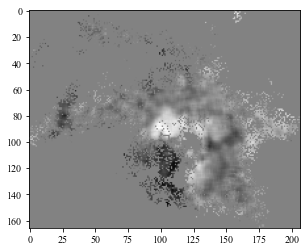

In [36]:
plt.imshow(hdul[0].data, cmap='gray')

In [37]:
dvar = tss.DeltaVariance(hdul[0])

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            WLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     56.78
Date:                Wed, 05 May 2021   Prob (F-statistic):           4.28e-06
Time:                        09:52:11   Log-Likelihood:                 29.296
No. Observations:                  15   AIC:                            -54.59
Df Residuals:                      13   BIC:                            -53.18
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7696      0.054    -14.356      0.0

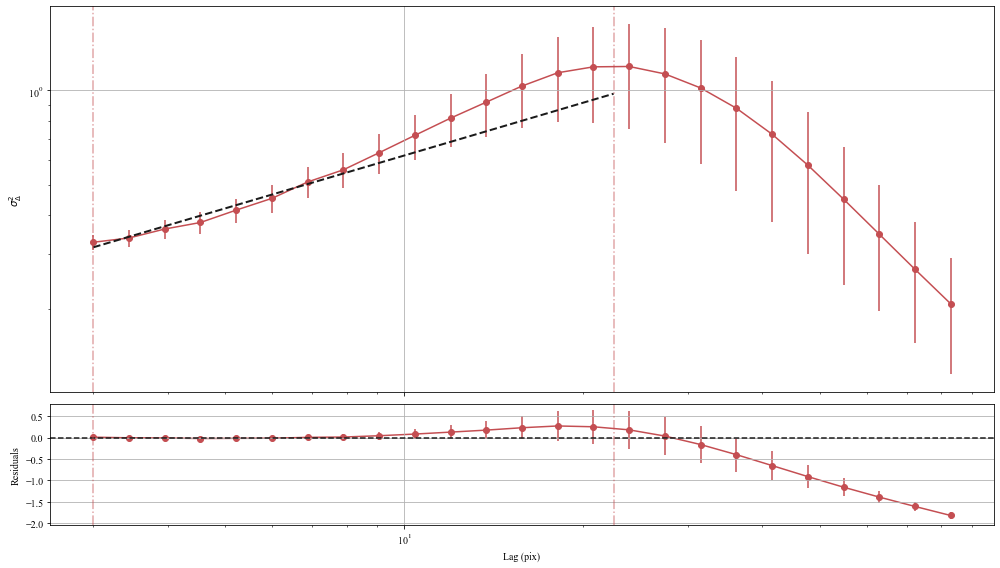

In [38]:
plt.figure(figsize=(14, 8))
dvar.run(verbose=True, boundary="fill",xlow=3*u.pix, xhigh=22.5*u.pix,)

In [39]:
T0='595TH.csv'
T=pd.read_csv(T0)
T.describe()

,pc,S
count,221.000000,221.000000
mean,116.543012,75.791911
std,67.126860,21.829071
min,1.050000,2.589052
25%,58.800000,59.708985
50%,116.550000,84.642658
75%,174.300000,89.287524
max,231.431529,105.170401


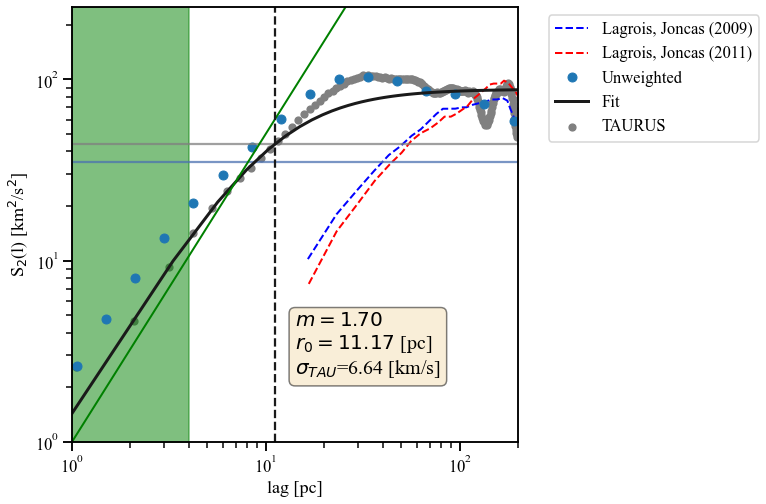

In [61]:
Sample='595'

samples=pd.read_csv('DT//'+Sample+'.csv',header=None)

DataNG=dict()
DataG=dict()

marker=itertools.cycle((r"$H$",r"$O$",r"$S$",r"$H$",r"$O$",r"$S$"))
#marker=itertools.cycle(('*','o','^','^','^','^','^','^','*','o'))
color=itertools.cycle(("red","red","red","black","black","black"))

sh=5.92
so=8.12
saz=4.85

for i in range(len(samples)):
    DataNG[i]=samples[0][i]
for i in range(len(samples)):
    DataG[i]=pd.read_csv('Data//'+DataNG[i]+'.csv')    

fig, ax=plt.subplots(figsize=(8,8))

plt.scatter(T['pc'],T['S'], marker='o',color="gray",s=45,label='TAURUS')

plt.loglog(DataG[0].pc,DataG[0].S, color='blue',linestyle='--',linewidth=2,label='Lagrois, Joncas (2009)')

plt.loglog(DataG[3].pc,DataG[3].S*sh**2, color='red',linestyle='--',linewidth=2,label='Lagrois, Joncas (2011)')

ax.plot(r, B, 'o', label="Unweighted")


ss=6.64**2
plt.axhline(6.64**2, color="gray", linestyle='-', alpha=0.75)

plt.axhline(5.92**2, color='b', linestyle='-', alpha=0.75)


lo=11.17

n=1.7

x=np.linspace(int(T.pc.min()),int(T.pc.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-',label='Fit',linewidth=3)



textstr = '\n'.join((r'$m=%.2f$'%+n, r'$r_{0}=%.2f$' % lo+' [pc]',
                     r'$σ_{TAU}$=6.64 [km/s]')) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.5, .3, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

ax.set_xlim(1, 200)
ax.set_ylim(1, 250)

xs=np.linspace(1,4,10)
ys=np.linspace(1,4,10)

ax.fill_between(xs, 0, 1, where=ys > 0.5,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

sgrid = np.logspace(0, 2.0)
ax.plot(sgrid, 1*sgrid**(1.7), color="green", lw=2)

plt.axvline(x=lo, color='k', linestyle='--')
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="21"

fig.savefig('SF595.pdf', bbox_inches='tight')

PDF/CDF

In [41]:
sb /= np.nanmean(sb)

In [42]:
header=0

In [43]:
input_data = (sb, header) 

In [44]:
pdf_mom0 = tss.PDF(input_data, min_val=0.0, bins=None)

Optimization terminated successfully.
         Current function value: 2.059227
         Iterations: 24
         Function evaluations: 48
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -18049.
Model:                     Likelihood   AIC:                         3.610e+04
Method:            Maximum Likelihood   BIC:                         3.613e+04
Date:                Wed, 05 May 2021                                         
Time:                        09:52:14                                         
No. Observations:                8765                                         
Df Residuals:                    8763                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

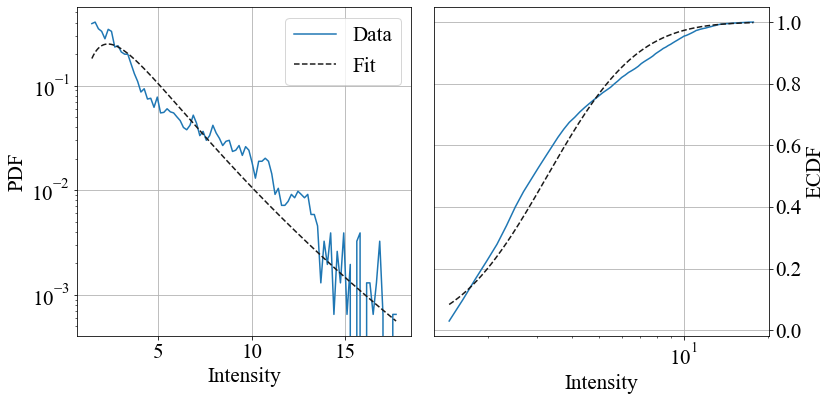

In [45]:
plt.figure(figsize=(12, 6))
pdf_mom0.run(verbose=True)

In [46]:
from scipy.stats import lognorm
import seaborn as sns
sns.set_color_codes()
sns.set_context("talk")

In [47]:
LN = lognorm(s=1.0, scale=np.exp(1.0))

[None]

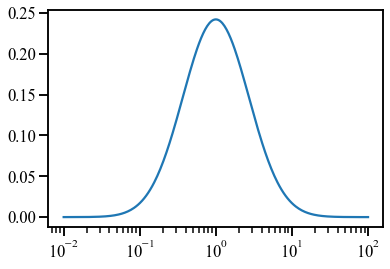

In [48]:
x = np.logspace(-2.0, 2.0, 300)
fig, ax = plt.subplots()
ax.plot(x, LN.pdf(x))
ax.set(xscale="log")

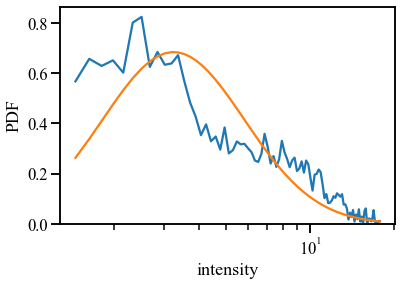

In [49]:
fig, ax = plt.subplots()
s, scale = pdf_mom0.model_params
LN = lognorm(s=s, scale=scale)
x = pdf_mom0.bins
ax.plot(x, x*pdf_mom0.pdf)
ax.plot(x, x*LN.pdf(x))
ax.set(
    xlabel="intensity",
    ylabel="PDF",
    xscale="log",
    ylim=[0, None],
);

In [50]:
pdf_mom0.model_params

array([0.58308114, 3.25345503])

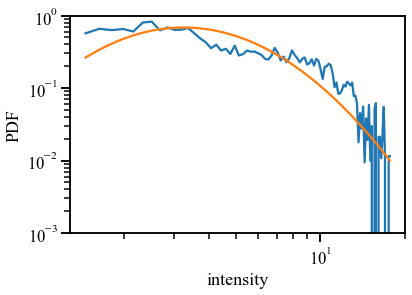

In [51]:
fig, ax = plt.subplots()
ax.plot(x, x*pdf_mom0.pdf)
ax.plot(x, x*LN.pdf(x))
ax.set(
    xlabel="intensity",
    ylabel="PDF",
    xscale="log",
    yscale="log",
    ylim=[1e-3, 1.0],
);

Optimization terminated successfully.
         Current function value: 3.932092
         Iterations: 27
         Function evaluations: 55
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -34465.
Model:                     Likelihood   AIC:                         6.894e+04
Method:            Maximum Likelihood   BIC:                         6.896e+04
Date:                Wed, 05 May 2021                                         
Time:                        09:52:15                                         
No. Observations:                8765                                         
Df Residuals:                    8763                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

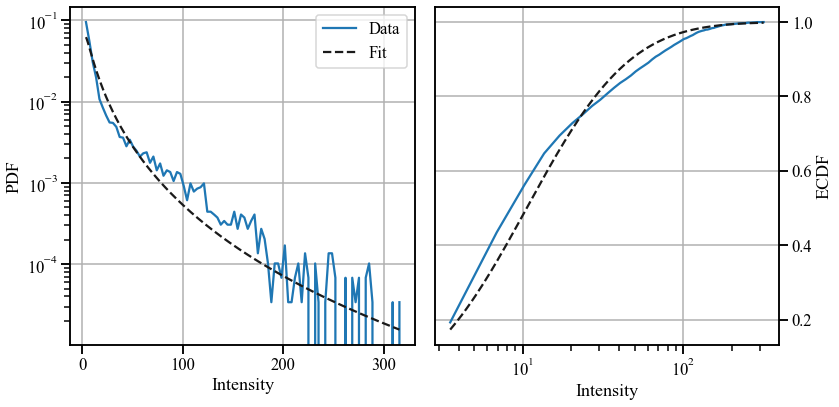

In [52]:
wpdf_mom0 = tss.PDF(input_data, min_val=0.0, weights=sb)
plt.figure(figsize=(12, 6))
wpdf_mom0.run(verbose=True)

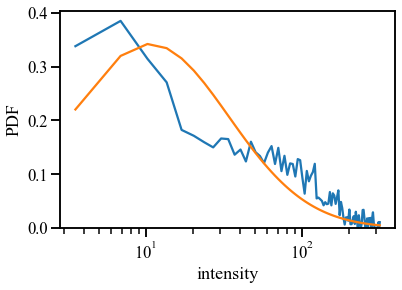

In [53]:
fig, ax = plt.subplots()
s, scale = wpdf_mom0.model_params
LN = lognorm(s=s, scale=scale)
x = wpdf_mom0.bins
ax.plot(x, x*wpdf_mom0.pdf)
ax.plot(x, x*LN.pdf(x))
ax.set(
    xlabel="intensity",
    ylabel="PDF",
    xscale="log",
    ylim=[0, None],
);

In [54]:
wpdf_mom0.model_params

array([ 1.16616227, 10.58496966])

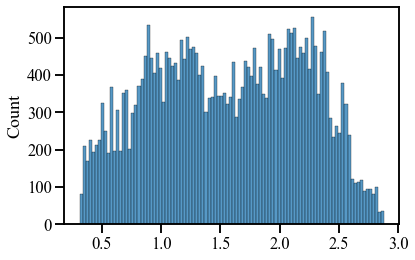

In [55]:
m = np.isfinite(sb) & (sb > 0.0)
sns.histplot(x=np.log(sb[m]), kde=False, weights=sb[m].astype(float), bins=100)

In [56]:
H, edges = np.histogram(np.log(sb[m]), weights=sb[m], bins=100, range=[-4.0, 2.5], density=True)

[Text(0, 0.5, 'PDF'), Text(0.5, 0, '$\\ln (S/S_0)$')]

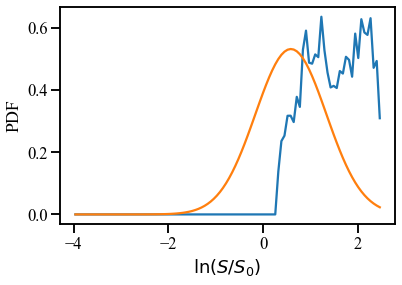

In [57]:
fig, ax = plt.subplots()
centers = 0.5*(edges[:-1] + edges[1:])
ax.plot(centers, H)
LN = lognorm(s=0.75,scale=1.8)
ax.plot(centers, np.exp(centers)*LN.pdf(np.exp(centers)))
ax.set(
    xlabel="$\ln (S/S_0)$",
    ylabel="PDF",
#    yscale="log",
#    ylim=[1e-3, 1.0],
)

[Text(0, 0.5, 'CDF'), Text(0.5, 0, '$\\ln (S/S_0)$')]

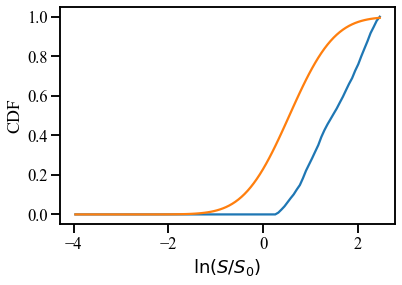

In [58]:
cdf = np.cumsum(H)*(centers[1] - centers[0])
fit = np.exp(centers)*LN.pdf(np.exp(centers))
cdf_fit = np.cumsum(fit)*(centers[1] - centers[0])

fig, ax = plt.subplots()
ax.plot(centers, cdf)
ax.plot(centers, cdf_fit)
ax.set(
    xlabel="$\ln (S/S_0)$",
    ylabel="CDF",
#    yscale="log",
#    ylim=[1e-3, 1.0],
)

[None,
 (0.0003333333333333333, 3000.0),
 Text(0, 0.5, 'CDF / (1 $-$ CDF)'),
 Text(0.5, 0, '$\\ln (S/S_0)$')]

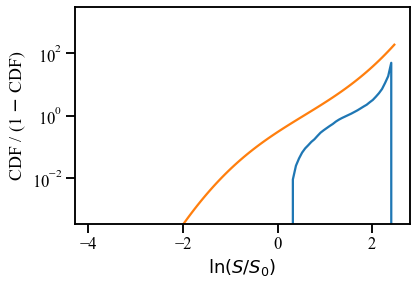

In [59]:
fig, ax = plt.subplots()
ax.plot(centers, cdf/(1 - cdf))
ax.plot(centers, cdf_fit/(1 - cdf_fit))
ax.set(
    xlabel="$\ln (S/S_0)$",
    ylabel="CDF / (1 $-$ CDF)",
    yscale="log",
    ylim=[1e-3/3, 3e3],
)

In [60]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 325.90763115882874 seconds ---
